In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np


In [2]:
! wget -O img1.jpg "https://drive.google.com/uc?export=download&id=1m_qcw9wiY6pTRrOzTWBH8LxMMgatMaFD"

--2020-12-14 05:08:12--  https://drive.google.com/uc?export=download&id=1m_qcw9wiY6pTRrOzTWBH8LxMMgatMaFD
Resolving drive.google.com (drive.google.com)... 172.217.214.100, 172.217.214.139, 172.217.214.102, ...
Connecting to drive.google.com (drive.google.com)|172.217.214.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-3s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/234mhe019qv28l5uh39rj5icgtp18rj5/1607922450000/12673633878481174778/*/1m_qcw9wiY6pTRrOzTWBH8LxMMgatMaFD?e=download [following]
--2020-12-14 05:08:13--  https://doc-0o-3s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/234mhe019qv28l5uh39rj5icgtp18rj5/1607922450000/12673633878481174778/*/1m_qcw9wiY6pTRrOzTWBH8LxMMgatMaFD?e=download
Resolving doc-0o-3s-docs.googleusercontent.com (doc-0o-3s-docs.googleusercontent.com)... 108.177.120.132, 2607:f8b0:4001:c18::84
Connecting to doc-0o-3s-docs.googleusercontent.com (d

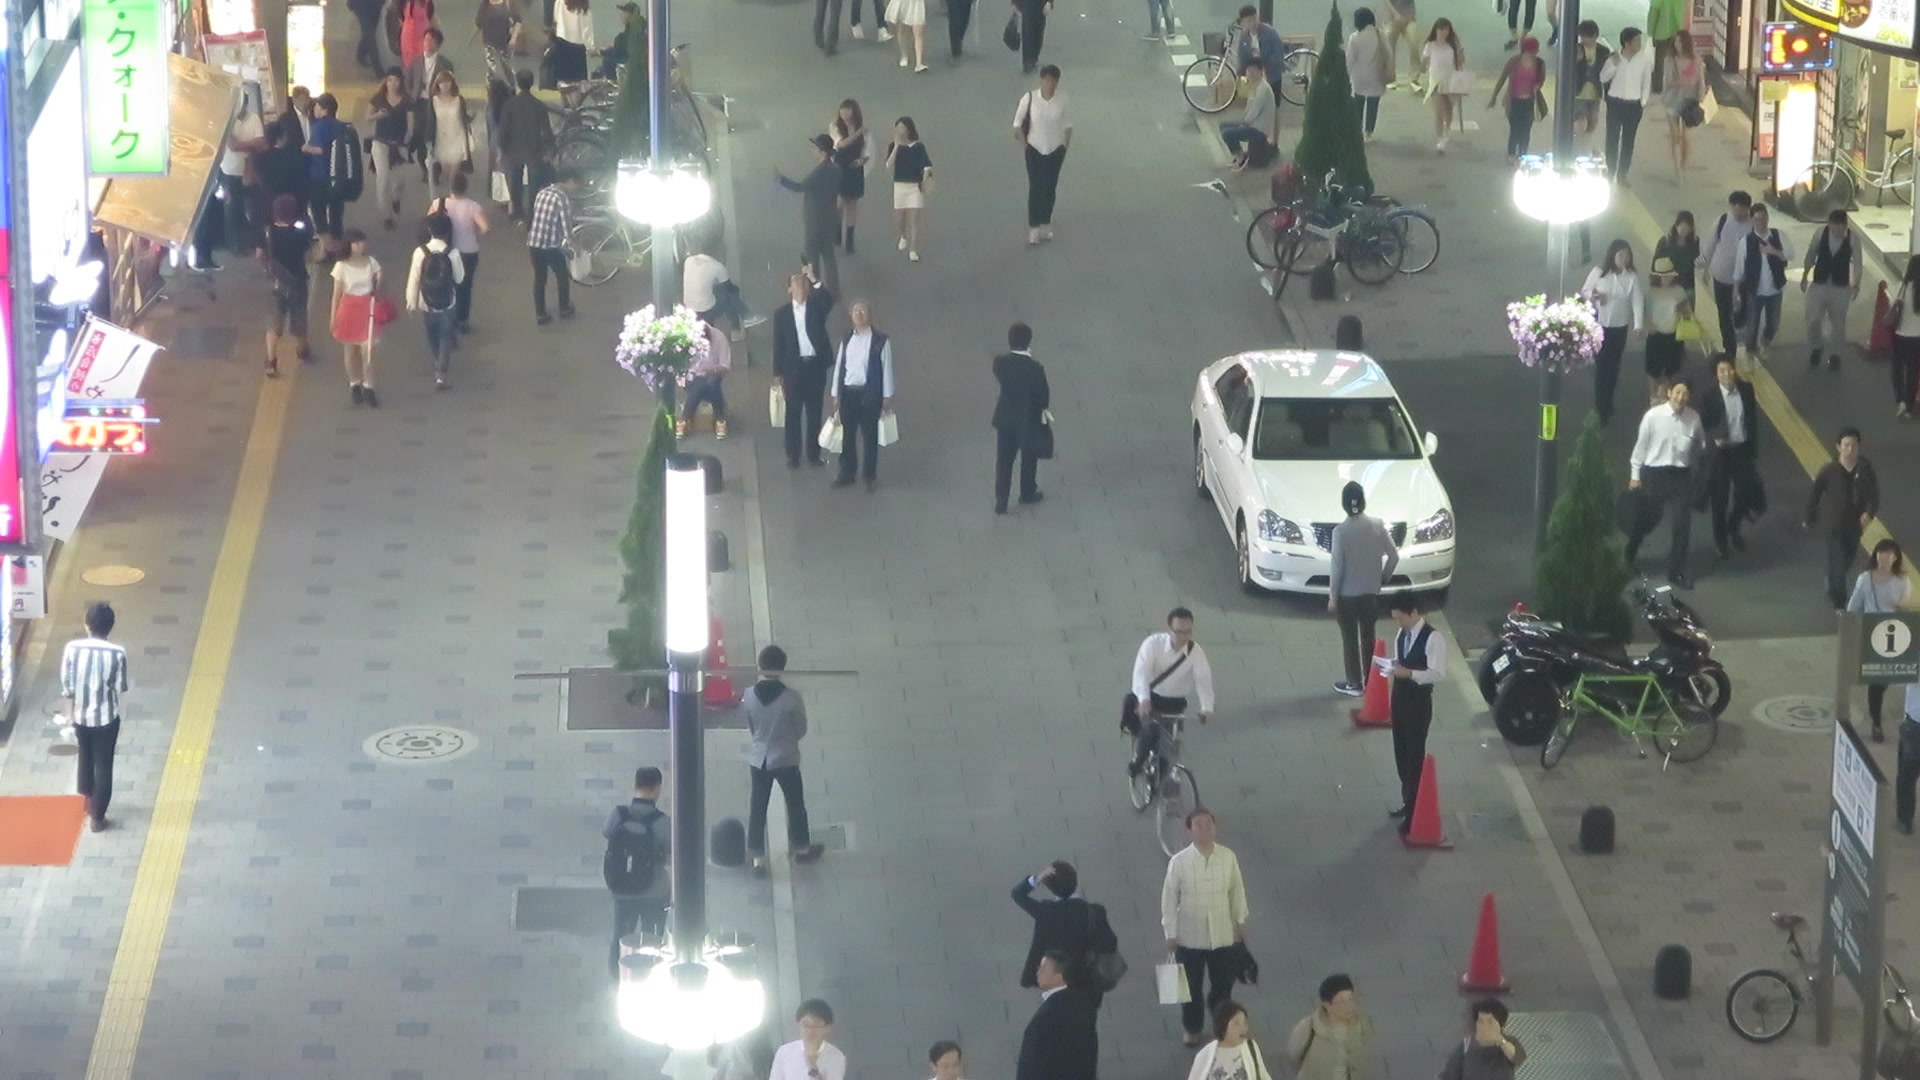

In [3]:
img1 = cv2.imread('img1.jpg')

cv2_imshow(img1)

In [4]:
tl = np.float32([307,594])
tr = np.float32([592,594])
bl = np.float32([251,866])
br = np.float32([582,867])


#ogPoints = np.float32([[307,594],[592,594],[251,866],[582,867]])
ogPoints = np.float32([tl, tr, bl, br])
origin = np.float32([1000,3000])
transformedPts = np.float32([origin + [0,0],origin + [300,0],origin + [0,600],origin + [300,600]])
T = cv2.getPerspectiveTransform(ogPoints,transformedPts)
T = T
print('T:', T)

#blah = np.array([[1.66085552, 1.26628137, 294.421528],[0.0518318303, 6.77169859, 631.124594],[0.0000172772768, 0.000927897617, 1.00000000]])

a = np.matmul(T, np.array([img1.shape[1], img1.shape[0], 1]))
newShape = (a[:2]/a[-1]).astype(int)
print('oldShape:', img1.shape)
print('newShape:', newShape)



T: [[1.66085552e+00 1.26628137e+00 2.94421528e+02]
 [5.18318303e-02 6.77169859e+00 6.31124594e+02]
 [1.72772768e-05 9.27897617e-04 1.00000000e+00]]
oldShape: (1080, 1920, 3)
newShape: [2383 3952]


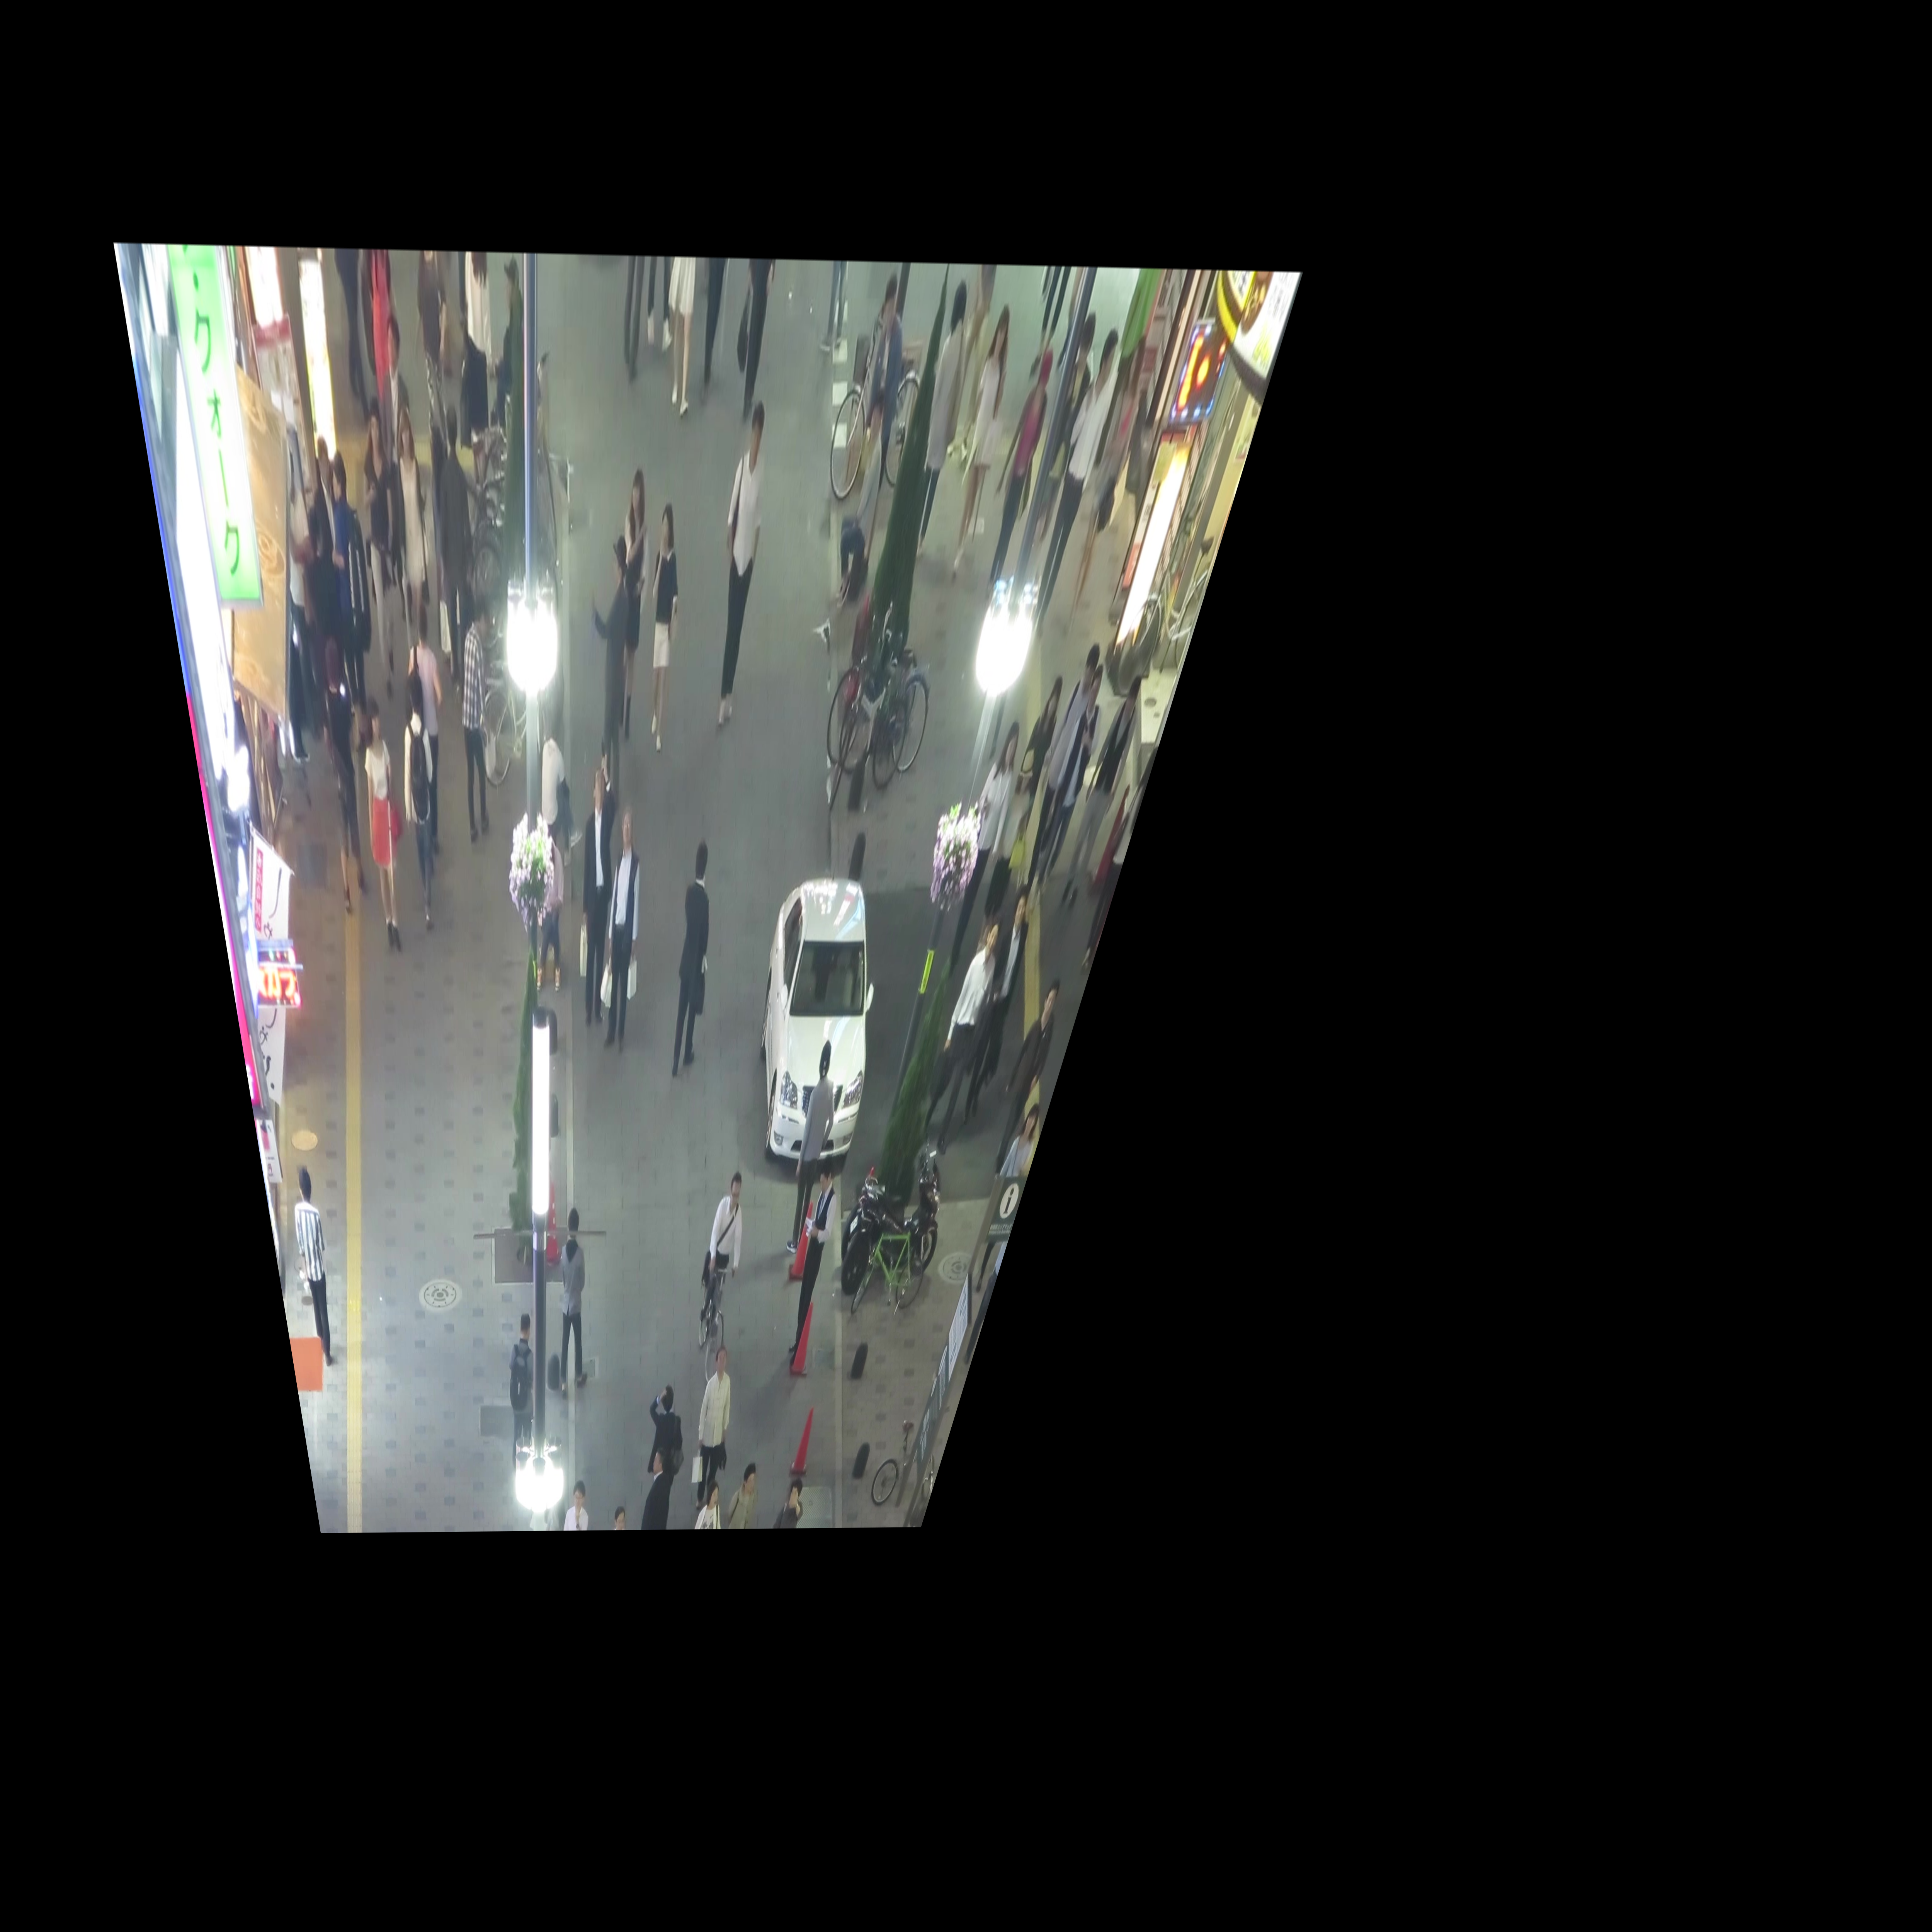

In [5]:
#flatImg = cv2.warpPerspective(img1,T,tuple(newShape))

flatImg = cv2.warpPerspective(img1,T,(5000,5000))
cv2_imshow(flatImg)